In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_ir = pd.read_excel('/content/iris .xls')
df_ir

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df_ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df_ir.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_ir.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
df_ir.shape

(150, 5)

In [10]:
classifications = df_ir["Classification"].value_counts()
classifications

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

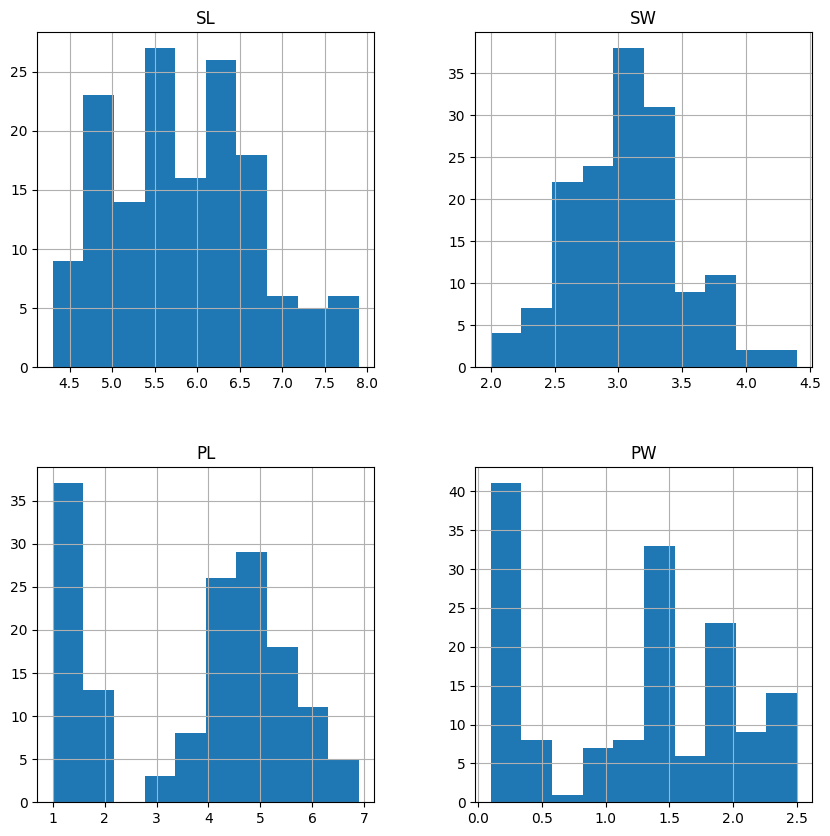

In [11]:
df_ir.hist(figsize =(10,10))
plt.show()

<ipython-input-12-7fe2baeceb31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ir.corr(), annot =True)


<Axes: >

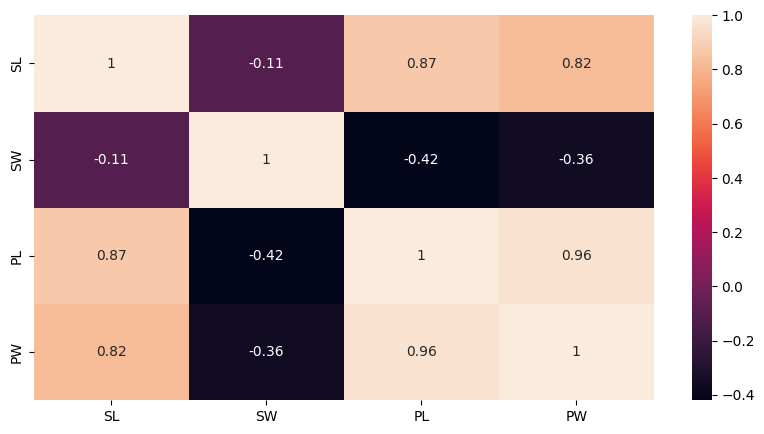

In [12]:
plt.figure(figsize =(10,5))
sns.heatmap(df_ir.corr(), annot =True)

<Axes: title={'center': 'CLASSIFICATION'}>

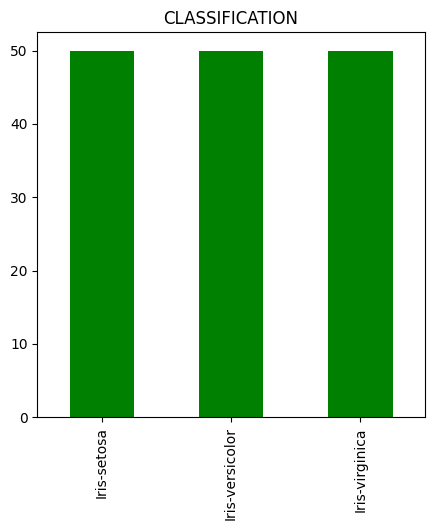

In [13]:
df_ir["Classification"].value_counts().plot.bar(figsize=(5,5), title= 'CLASSIFICATION', color = 'green')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
#le = LabelEncoder()
#df_ir['Classification'] = le.fit_transform(df_ir['Classification'])
#df_ir['Classification']

In [16]:
df_ir["Classification"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df_ir.drop(['Classification'],axis = 1)
y = df_ir['Classification']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [20]:
#LR

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
lr = LogisticRegression()
model  = lr.fit(x_train,y_train)
lr_predictions = model.predict(x_test)

In [22]:
lr_predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [23]:
print('Logistic regression Accuracy is ',accuracy_score(y_test,lr_predictions))

Logistic regression Accuracy is  1.0


In [24]:
confusion_matrix(y_test,lr_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [25]:
#Dumbing the model

import pickle

In [26]:
filename = 'finalized_model.pkl'

In [27]:
pickle.dump(model,open(filename,"wb"))

In [28]:
pickled_model =pickle.load(open(filename,"rb"))

In [29]:
x_test.head(10)

,SL,SW,PL,PW
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [31]:
pickled_model.predict([[6.1,2.8,4.7,1.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)